In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
관심도 = pd.read_csv("관심도.CSV", engine = 'python', encoding = 'utf-8-sig')

In [4]:
거래정보 = pd.read_csv("거래 정보.CSV", engine = 'python')

In [5]:
거래정보.columns = ['클라이언트ID', '거래ID', '거래일련번호', '업종단위', '상품소분류코드', '구매일자', '구매시각', '구매금액', '구매수량']

In [6]:
상품코드개수final = pd.read_csv("상품코드개수final.CSV", engine = 'python', encoding = 'utf-8')

In [7]:
거래정보.head()

,클라이언트ID,거래ID,거래일련번호,업종단위,상품소분류코드,구매일자,구매시각,구매금액,구매수량
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


In [8]:
구매금액 = 거래정보.pivot_table(index = ['클라이언트ID'],aggfunc = 'max', values = '구매금액').reset_index()

In [9]:
관심도거래정보 = pd.merge(구매금액, 관심도, on = '클라이언트ID', how = 'left')

In [10]:
관심도거래정보.drop(['Unnamed: 0', '세션일자1', '세션일자2', '세션일자3', '세션일자4', '세션일자5',
       '세션일자6', '세션일자7', '세션일자8', '세션일자9', '세션일자10', '세션일자11', '세션일자12',
       '세션일자13'], axis = 1, inplace = True)

In [11]:
관심도거래정보.head()

,클라이언트ID,구매금액,관심도
0,2,46430,1.538462
1,9,149500,2.538462
2,12,29900,0.076923
3,20,18900,0.076923
4,23,27000,1.615385


In [12]:
충성도 = pd.merge(관심도거래정보, 상품코드개수final,  on = '클라이언트ID', how = 'left')

In [13]:
충성도.drop('Unnamed: 0', axis = 1, inplace = True)

In [14]:
충성도 = 충성도.fillna(0) # filtered0 으로 채우기

In [15]:
온라인정보 = pd.read_csv("온라인 행동 정보.CSV", engine = 'python', encoding = 'utf-8-sig')

In [16]:
온라인정보.columns = ['클라이언트ID', '세션ID', '조회일련번호', '행동유형', '업종단위', 
                 '세션일자', '조회시각','조회경과시간', '거래ID', '검색 키워드',
                '총페이지조회건수', '총세션시간값', '유입채널', '기기유형']

In [17]:
len(충성도)

11284

In [18]:
검색키워드 = 온라인정보.pivot_table(index = ['클라이언트ID'], aggfunc = 'count', values = '검색 키워드').reset_index()

In [19]:
충성도 = pd.merge(충성도, 검색키워드,  on = '클라이언트ID', how = 'left')

In [20]:
충성도.head()

,클라이언트ID,구매금액,관심도,filtered2,검색 키워드
0,2,46430,1.538462,0.0,46
1,9,149500,2.538462,0.0,33
2,12,29900,0.076923,0.0,1
3,20,18900,0.076923,0.0,0
4,23,27000,1.615385,0.0,55


In [21]:
충성도['상품코드기여율'] = 충성도['filtered2']/충성도['검색 키워드']

In [22]:
충성도 = 충성도.dropna(axis = 0, subset = ['상품코드기여율'])

In [23]:
import matplotlib.pyplot  as plt
import seaborn as sns

In [24]:
import matplotlib as mpl

mpl.rcParams['font.family'].insert(0, 'Malgun Gothic')

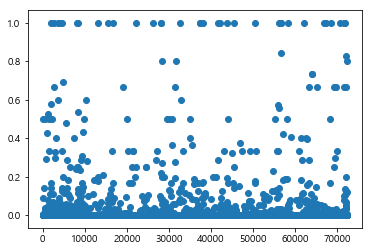

In [25]:
plt.scatter(충성도['클라이언트ID'], 충성도['상품코드기여율'])

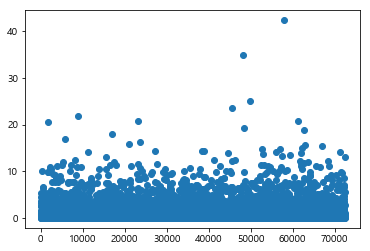

In [26]:
plt.scatter(충성도['클라이언트ID'], 충성도['관심도'])

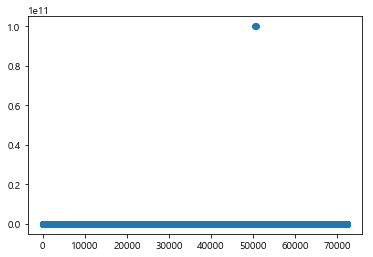

In [27]:
plt.scatter(충성도['클라이언트ID'], 충성도['구매금액'])

In [28]:
충성도.drop(충성도[충성도['구매금액']> 1000000000].index,inplace = True)

In [29]:
충성도 = 충성도.reset_index()

In [30]:
충성도.head()

,index,클라이언트ID,구매금액,관심도,filtered2,검색 키워드,상품코드기여율
0,0,2,46430,1.538462,0.0,46,0.0
1,1,9,149500,2.538462,0.0,33,0.0
2,2,12,29900,0.076923,0.0,1,0.0
3,4,23,27000,1.615385,0.0,55,0.0
4,5,24,48900,1.461538,0.0,46,0.0


In [31]:
충성도.drop(충성도[충성도['구매금액'] == 0].index, inplace = True)

In [32]:
충성도 = 충성도.reset_index()

In [33]:
충성도.head()

,level_0,index,클라이언트ID,구매금액,관심도,filtered2,검색 키워드,상품코드기여율
0,0,0,2,46430,1.538462,0.0,46,0.0
1,1,1,9,149500,2.538462,0.0,33,0.0
2,2,2,12,29900,0.076923,0.0,1,0.0
3,3,4,23,27000,1.615385,0.0,55,0.0
4,4,5,24,48900,1.461538,0.0,46,0.0


## scaling

In [34]:
# RobustScaler
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler()
robustScaler.fit(충성도[['구매금액', '관심도', '상품코드기여율']])
train_data_robustScaled = robustScaler.transform(충성도[['구매금액', '관심도', '상품코드기여율']])

In [35]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(충성도[['구매금액', '관심도', '상품코드기여율']])
train_data_minMaxScaled = minMaxScaler.transform(충성도[['구매금액', '관심도', '상품코드기여율']])

In [45]:
robust_Scale = pd.DataFrame(train_data_robustScaled)
robust_Scale.columns = ['구매금액_robust_Scale', '관심도_robust_Scale', '상품코드기여율_robust_Scale']

In [46]:
MinMax_Scale = pd.DataFrame(train_data_minMaxScaled)
MinMax_Scale.columns = ['구매금액_Min/Max_Scale', '관심도_Min/Max_Scale', '상품코드기여율_Min/Max_Scale']

In [47]:
거래소비자__충성도 = pd.concat([충성도, robust_Scale,MinMax_Scale ], axis = 1)

In [48]:
거래소비자__충성도.head()

,level_0,index,클라이언트ID,구매금액,관심도,filtered2,검색 키워드,상품코드기여율,구매금액_robust_Scale,관심도_robust_Scale,상품코드기여율_robust_Scale,구매금액_Min/Max_Scale,관심도_Min/Max_Scale,상품코드기여율_Min/Max_Scale
0,0,0,2,46430,1.538462,0.0,46,0.0,0.103271,0.7500,0.0,0.003926,0.034608,0.0
1,1,1,9,149500,2.538462,0.0,33,0.0,1.708723,1.5625,0.0,0.012661,0.058288,0.0
2,2,2,12,29900,0.076923,0.0,1,0.0,-0.154206,-0.4375,0.0,0.002525,0.000000,0.0
3,3,4,23,27000,1.615385,0.0,55,0.0,-0.199377,0.8125,0.0,0.002280,0.036430,0.0
4,4,5,24,48900,1.461538,0.0,46,0.0,0.141745,0.6875,0.0,0.004136,0.032787,0.0


In [49]:
feature_robust_Scale = 거래소비자__충성도[ ['구매금액_robust_Scale', '관심도_robust_Scale', '상품코드기여율_robust_Scale']]
feature_robust_Scale.head()

,구매금액_robust_Scale,관심도_robust_Scale,상품코드기여율_robust_Scale
0,0.103271,0.7500,0.0
1,1.708723,1.5625,0.0
2,-0.154206,-0.4375,0.0
3,-0.199377,0.8125,0.0
4,0.141745,0.6875,0.0


In [50]:
feature_MinMax_Scale = 거래소비자__충성도[ ['구매금액_Min/Max_Scale', '관심도_Min/Max_Scale', '상품코드기여율_Min/Max_Scale']]
feature_MinMax_Scale.head()

,구매금액_Min/Max_Scale,관심도_Min/Max_Scale,상품코드기여율_Min/Max_Scale
0,0.003926,0.034608,0.0
1,0.012661,0.058288,0.0
2,0.002525,0.000000,0.0
3,0.002280,0.036430,0.0
4,0.004136,0.032787,0.0


In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature_MinMax_Scale)
predict = pd.DataFrame(model.predict(feature_MinMax_Scale))
#print(predict)
predict.columns=['predict']  # predcit는 군집에 라벨링해주는 것
                             # 이 데이터는 군집0, 군집1, 군집2에 들어간다 

# concatenate labels to df as a new column
r = pd.concat([feature_MinMax_Scale,predict],axis=1)

print(r)

      구매금액_Min/Max_Scale  관심도_Min/Max_Scale  상품코드기여율_Min/Max_Scale  predict
0               0.003926           0.034608               0.000000        0
1               0.012661           0.058288               0.000000        0
2               0.002525           0.000000               0.000000        0
3               0.002280           0.036430               0.000000        0
4               0.004136           0.032787               0.000000        0
5               0.000805           0.027322               0.087719        0
6               0.006654           0.009107               0.000000        0
7               0.023636           0.107468               0.000000        2
8               0.007610           0.020036               0.000000        0
9               0.004297           0.016393               0.000000        0
10              0.004263           0.125683               0.000000        2
11              0.012458           0.029144               0.000000        0
12          

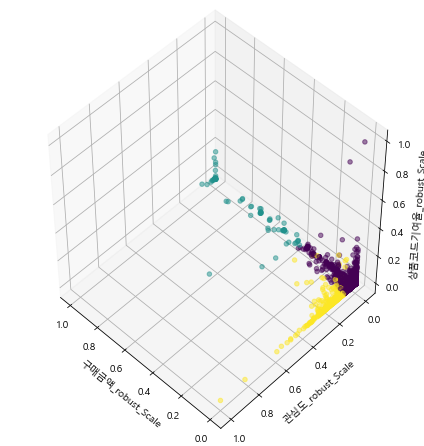

In [52]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter( r['상품코드기여율_Min/Max_Scale'],r['관심도_Min/Max_Scale'],r['구매금액_Min/Max_Scale'], c=r['predict'],alpha=0.5)
ax.set_xlabel('구매금액_robust_Scale')
ax.set_ylabel('관심도_robust_Scale')
ax.set_zlabel('상품코드기여율_robust_Scale')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


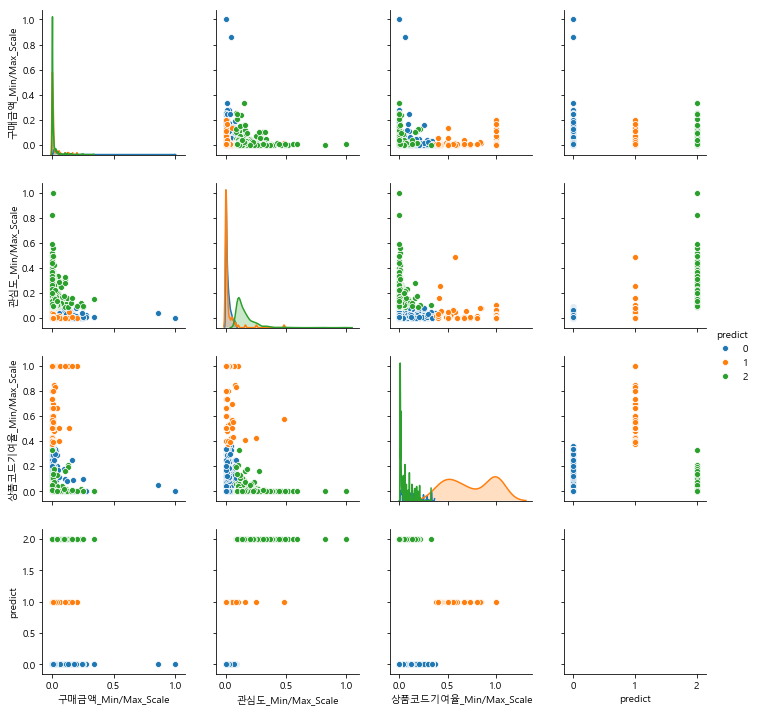

In [53]:
#pairplot with Seaborn
sns.pairplot(r, hue='predict')
plt.show()